In [1]:
# Temperature change vs energy use vs waste disposal

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(color_codes=True)

In [3]:
#load csv

In [4]:
temp = pd.read_csv("temperature_change_data_11-29-2021.csv")
energy = pd.read_csv("energy_use_data_11-29-2021.csv")
waste_disposal = pd.read_csv("waste_disposal_data_11-29-2021.csv")

In [5]:
#countries to keep

In [6]:
areas_to_keep = ["China"]

In [7]:
#filter the data

In [8]:
evolution_temp = temp[(temp["Flag Description"] != "Data Not Available") &
                (temp["Months"] == "Meteorological year") & 
                (temp["Area"].isin(areas_to_keep))].reset_index(drop=True)
evolution_energy = energy[(energy["Area"].isin(areas_to_keep))].reset_index(drop=True)
evolution_waste_disposal =waste_disposal[(waste_disposal["Area"].isin(areas_to_keep))].reset_index(drop=True)

In [9]:
# group by area and year

In [10]:
evolution_temp = evolution_temp.groupby(["Area", "Year"])["Value"].mean().reset_index()
evolution_energy = evolution_energy = evolution_energy.groupby(["Area", "Year"])["Value"].mean().reset_index()
evolution_waste_disposal = evolution_waste_disposal.groupby(["Area", "Year"])["Value"].mean().reset_index()

In [11]:
# merge the datasets

In [12]:
df1 = pd.merge(evolution_energy,evolution_temp, on='Year', how='left')
df2 = pd.merge(evolution_waste_disposal,evolution_temp, on='Year', how='left')

In [13]:
df1.head()

,Area_x,Year,Value_x,Area_y,Value_y
0,China,1970,1.22802,China,-0.307
1,China,1971,1.15678,China,0.034
2,China,1972,1.03212,China,0.009
3,China,1973,1.25898,China,0.408
4,China,1974,1.05966,China,-0.010


In [14]:
df2.head()

,Area_x,Year,Value_x,Area_y,Value_y
0,China,1990,9829.096328,China,0.857
1,China,1991,9853.192064,China,0.527
2,China,1992,9894.065577,China,0.129
3,China,1993,9911.234135,China,0.281
4,China,1994,9997.159768,China,0.731


In [15]:
# plots

(array([-0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
         1.75]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

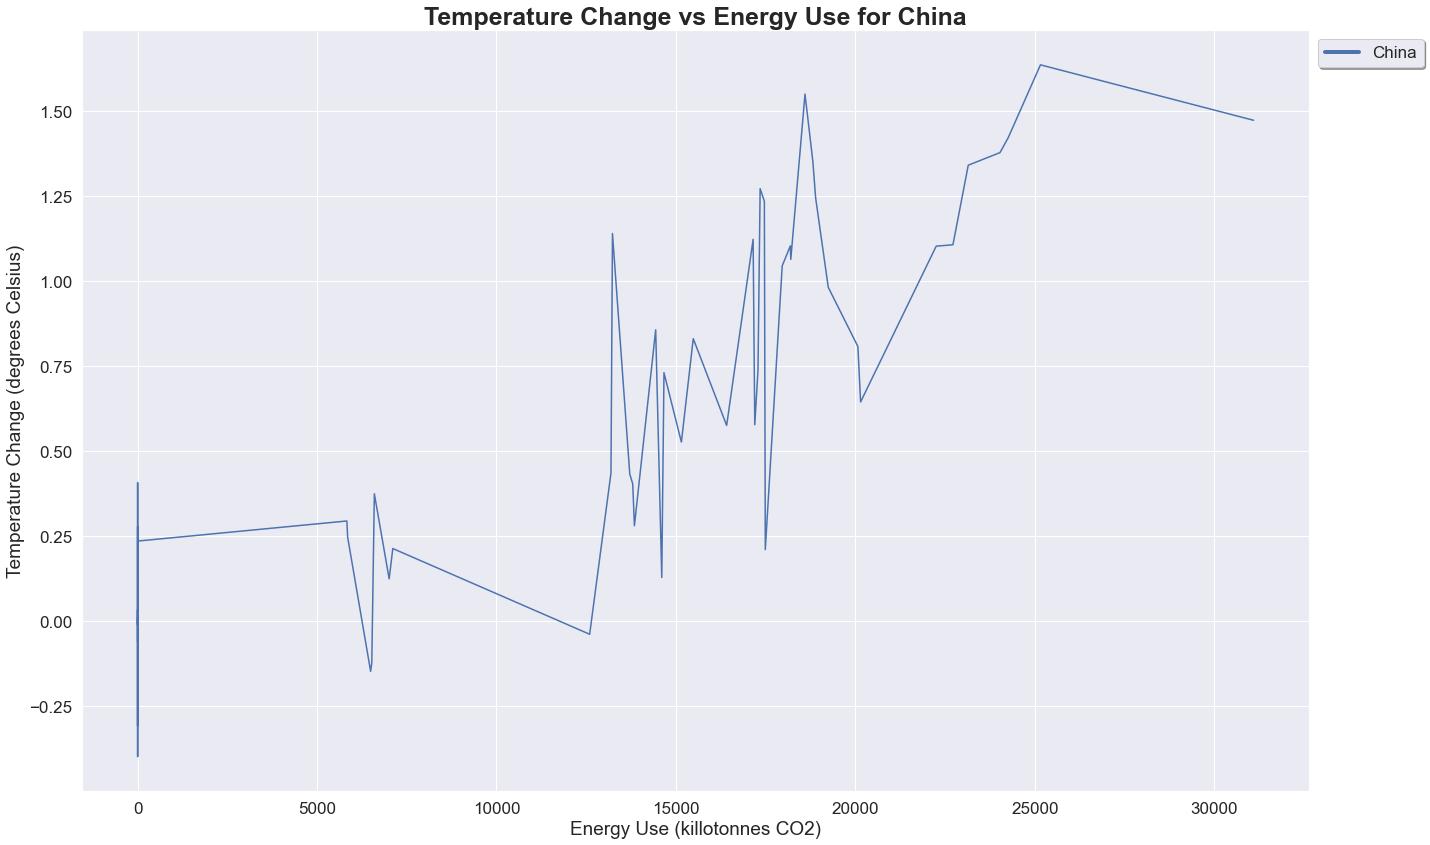

In [20]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=df1, x="Value_x", y="Value_y", hue="Area_x")

# Add a general title
plt.title("Temperature Change vs Energy Use for China", fontsize=25, weight="bold")

# Format axis labels
plt.xlabel("Energy Use (killotonnes CO2)", fontsize=19)
plt.ylabel("Temperature Change (degrees Celsius)", fontsize=19)

# Add a legend
leg = line.legend(fontsize=17, bbox_to_anchor= (1.1,1), shadow=1)
for legend_line in leg.get_lines():
    legend_line.set_linewidth(4)

# Format axis ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

Text(0, 0.01, 'Decrease')

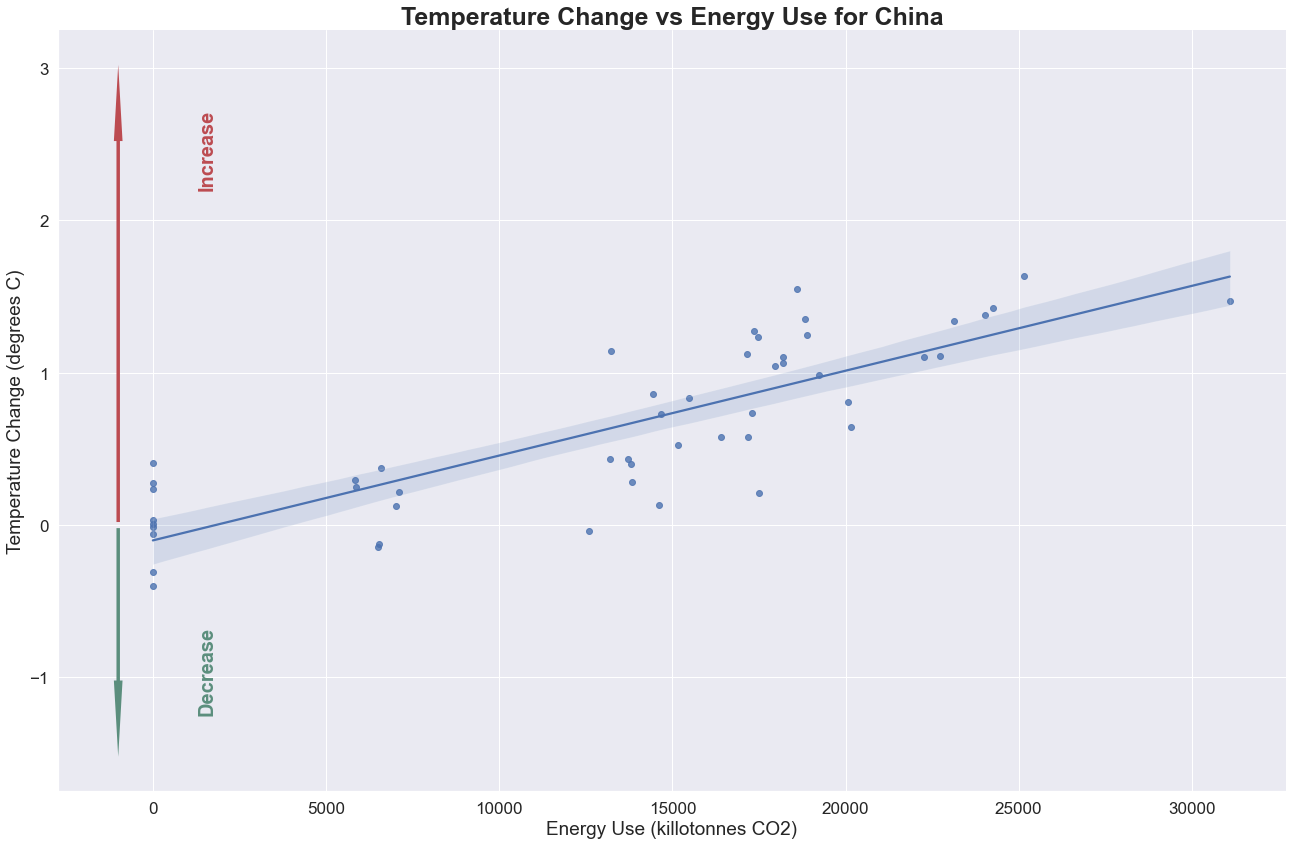

In [17]:
plt.figure(figsize=(22, 14))
# Plot the initial linechart
lmplot = sns.regplot(data=df1, x="Value_x", y="Value_y")

# Add a general title
plt.title("Temperature Change vs Energy Use for China", fontsize=25, weight="bold")

# Format axis labels
plt.xlabel("Energy Use (killotonnes CO2)", fontsize=19)
plt.ylabel("Temperature Change (degrees C)", fontsize=19)

# Format axis ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Despinde for better readability
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)

# Add arrows for better visualization
plt.arrow(x=-1000, y=0.02, dx=0, dy=2.5, width=100, head_width=250, head_length=0.5,
          facecolor='#BC4B51', edgecolor='none')
plt.arrow(x=-1000, y=-0.02, dx=0, dy=-1, width=100, head_width=250, head_length=0.5,
          facecolor='#5B8E7D', edgecolor='none')
# Add text helpers
plt.text(0, 0.7, 'Increase', fontsize=20, color='#BC4B51', weight="bold",
         rotation="vertical", transform=line.transAxes)
plt.text(0, 0.01, 'Decrease', fontsize=20, color='#5B8E7D', weight="bold",
         rotation="vertical", transform=line.transAxes)

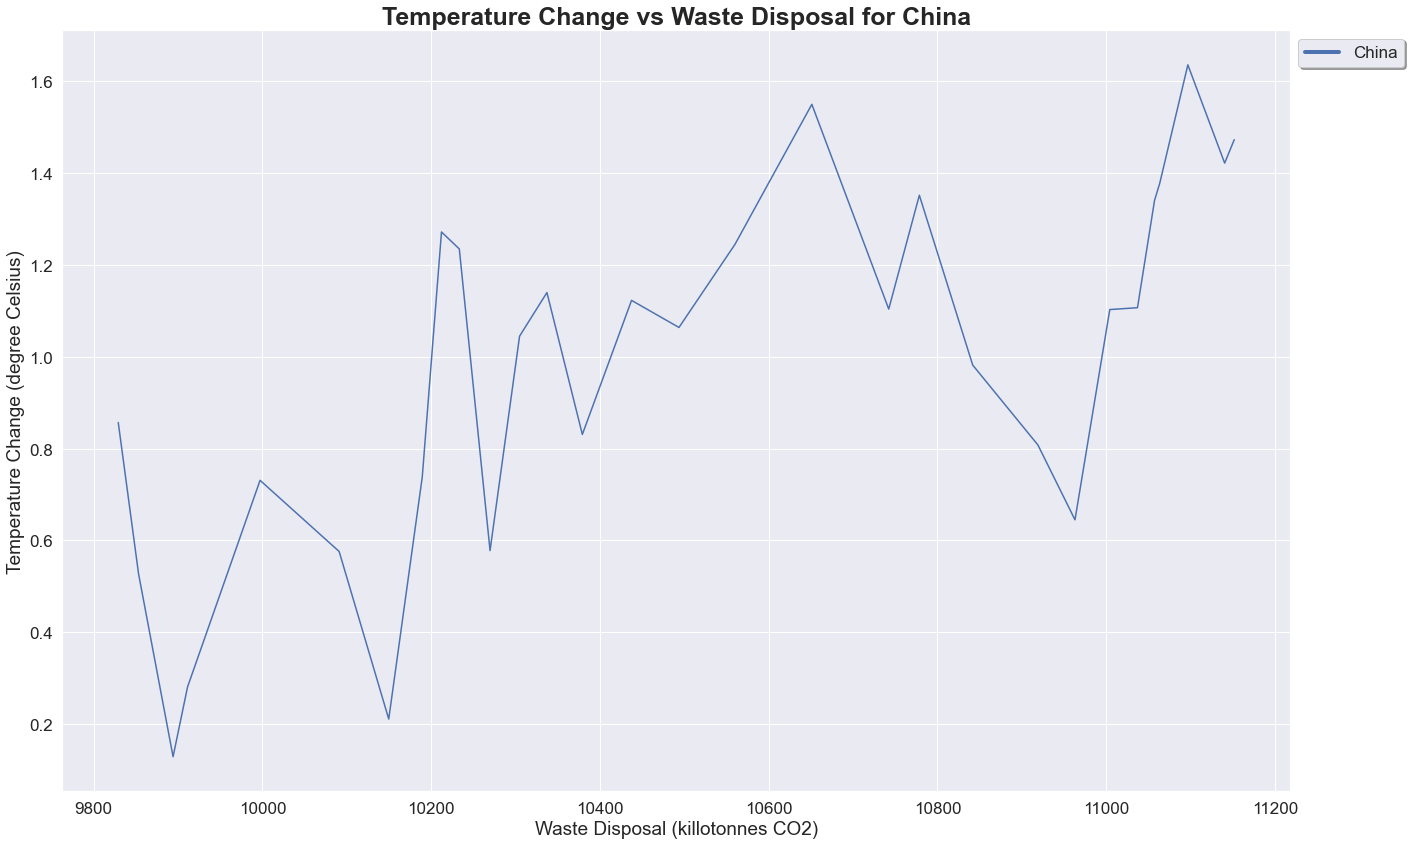

In [21]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=df2, x="Value_x", y="Value_y", hue="Area_x")

# Add a general title
plt.title("Temperature Change vs Waste Disposal for China", fontsize=25, weight="bold")

# Format axis labels
plt.xlabel("Waste Disposal (killotonnes CO2)", fontsize=19)
plt.ylabel("Temperature Change (degree Celsius)", fontsize=19)

# Format axis ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17) 

# Add a legend
leg = line.legend(fontsize=17, bbox_to_anchor= (1.1,1), shadow=1)
for legend_line in leg.get_lines():
    legend_line.set_linewidth(4)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

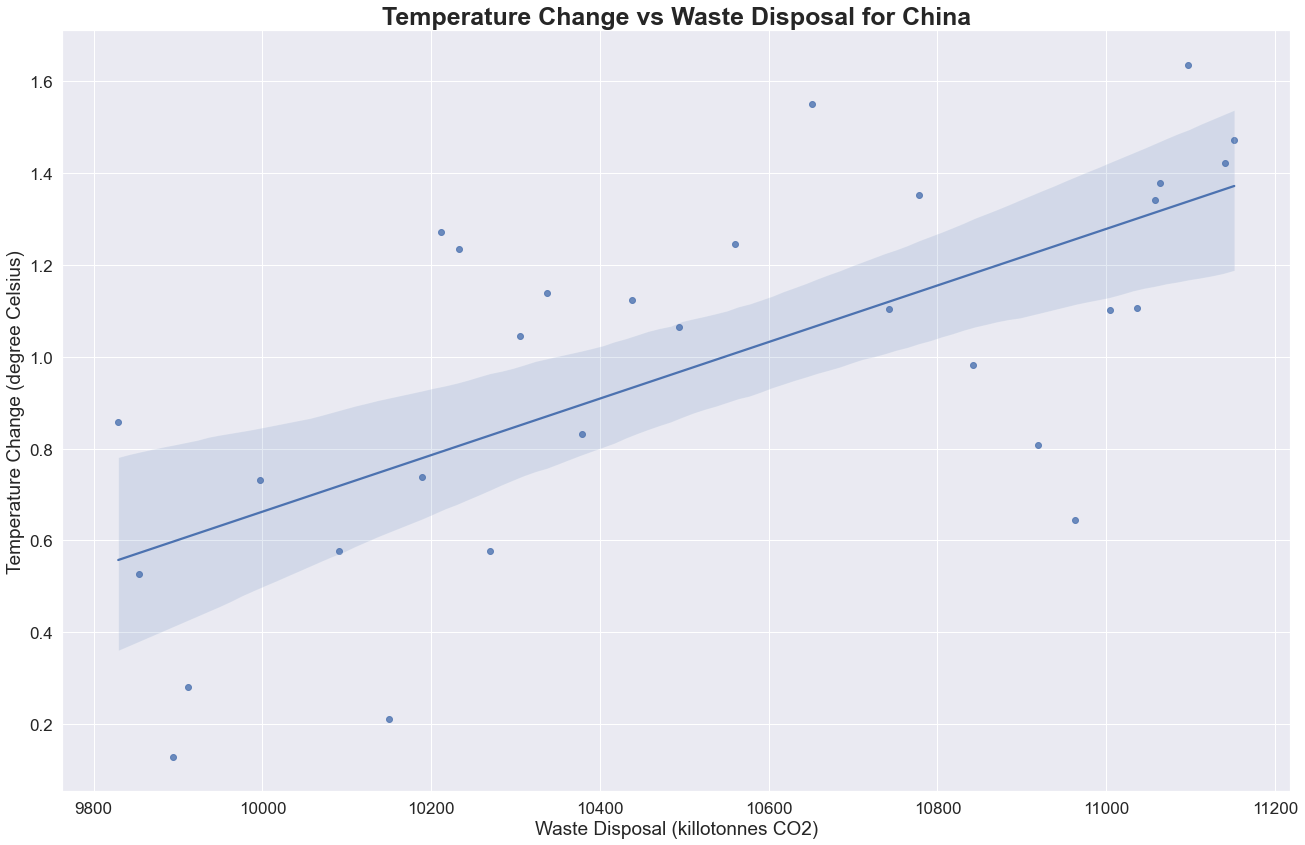

In [19]:
plt.figure(figsize=(22, 14))
# Plot the initial linechart
lmplot = sns.regplot(data=df2, x="Value_x", y="Value_y")

# Add a general title
plt.title("Temperature Change vs Waste Disposal for China", fontsize=25, weight="bold")

# Format axis labels
plt.xlabel("Waste Disposal (killotonnes CO2)", fontsize=19)
plt.ylabel("Temperature Change (degree Celsius)", fontsize=19)

# Format axis ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)